# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [66]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [2]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [3]:
# Print dataset
print(dataset)


     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width          Flower
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [4]:
# Print dataset shape
print(dataset.shape)


(150, 5)


In [5]:
# Print column names

print(dataset.columns)

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')


2. Drop rows with any missing values


In [27]:
# Drop na
drop_rows = dataset.dropna()
print(dataset.shape)

(150, 5)


3. Encoding the class label categorical column: from string to num


In [12]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
flower_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
dataset["Flower"] = dataset["Flower"].map(flower_mapping)

print("\nDataset after encoding Flower column:")
print(dataset.head())

#Visualize the dataset



Dataset after encoding Flower column:
   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


Now the label/category is numeric


4. Discard columns that won't be used


In [14]:
# Drop out non necesary columns
columns_to_drop = []
dataset_cleaned = dataset.drop(columns=columns_to_drop, axis=1)

5. Scatter plot of the data

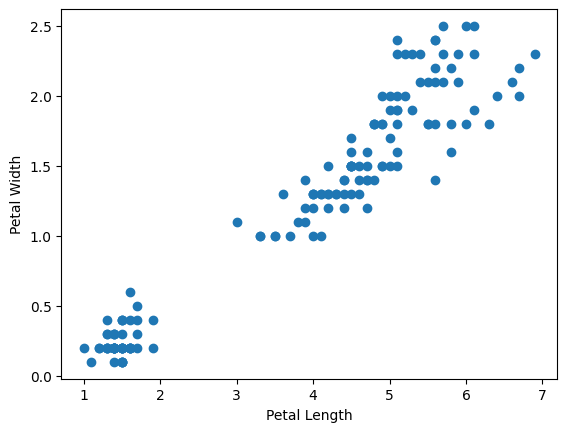

In [15]:
# Scatter plot of Petal_Length vs Petal_Width

plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


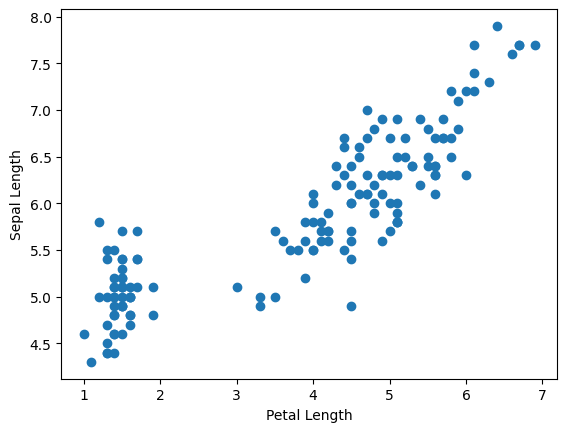

In [16]:
# Scatter plot of Petal_Length vs Sepal_Length
plt.scatter(dataset.Petal_Length,dataset.Sepal_Length)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.show()

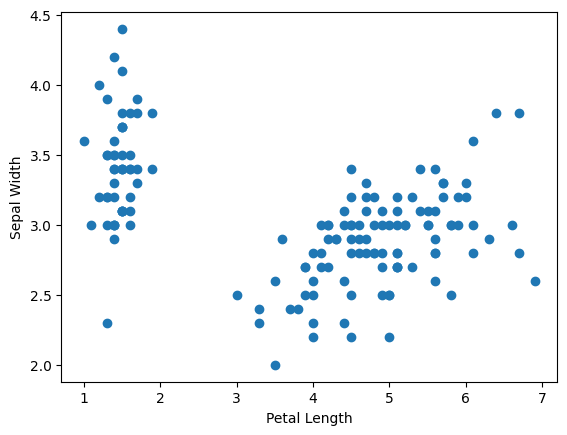

In [17]:
# Scatter plot of Petal_Length vs Sepal_Width
plt.scatter(dataset.Petal_Length,dataset.Sepal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.show()

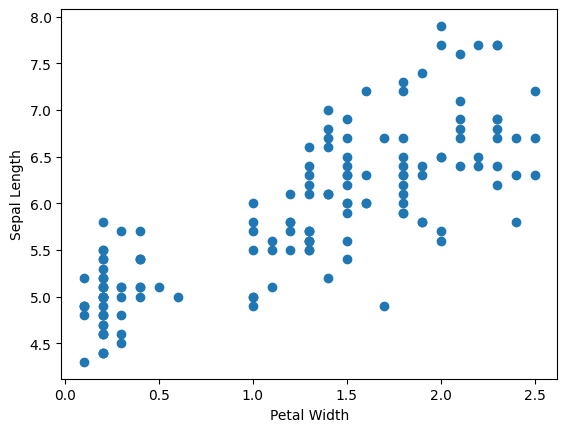

In [18]:
# Scatter plot of Petal_Width vs Sepal_Length
plt.scatter(dataset.Petal_Width,dataset.Sepal_Length)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()

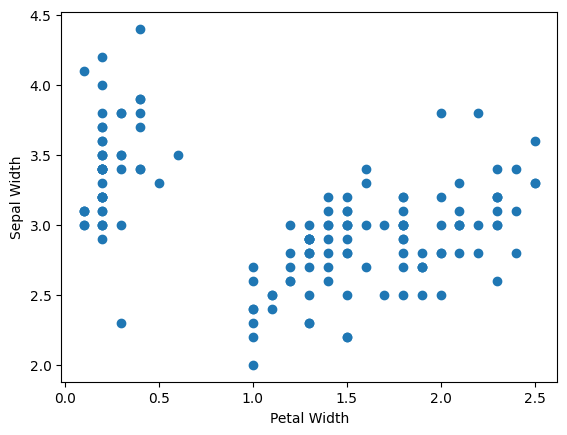

In [19]:
# Scatter plot of Petal_Width vs Sepal_Width
plt.scatter(dataset.Petal_Width,dataset.Sepal_Width)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.show()

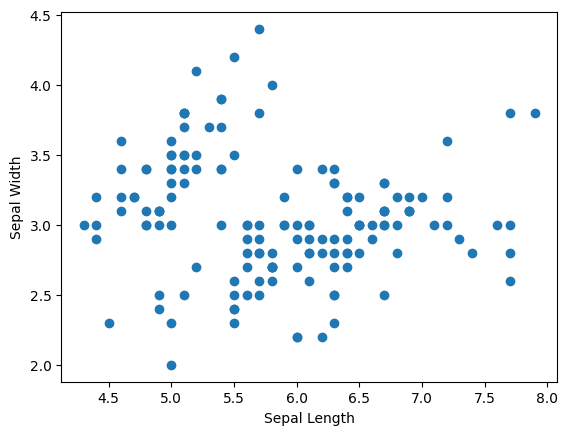

In [20]:
# Scatter plot of Sepal_Length vs Sepal_Width
plt.scatter(dataset.Sepal_Length,dataset.Sepal_Width)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

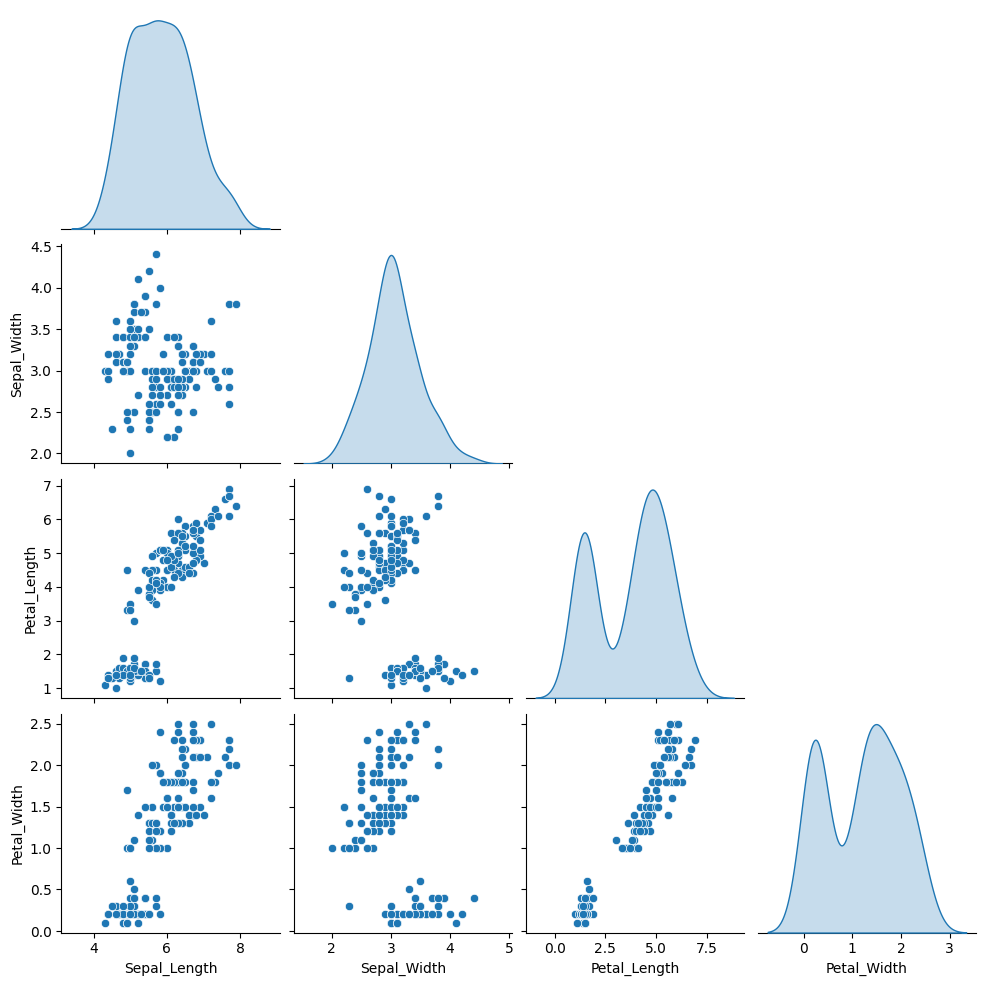

In [21]:
# Pairplot: Scatterplot of all variables (not the flower type)
g = sns.pairplot(dataset[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], corner=True, diag_kind="kde")
#g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [23]:
# Get dataframes for each real cluster
setosa = dataset[dataset["Flower"] == 0]
versicolor = dataset[dataset["Flower"] == 1]
virginica = dataset[dataset["Flower"] == 2]

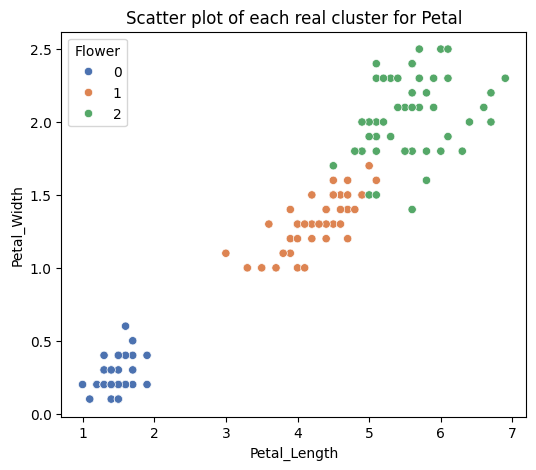

In [24]:
# Scatter plot of each real cluster for Petal
plt.figure(figsize=(6, 5))
sns.scatterplot(x=dataset["Petal_Length"], y=dataset["Petal_Width"], hue=dataset["Flower"], palette="deep")
plt.title("Scatter plot of each real cluster for Petal")
plt.show()

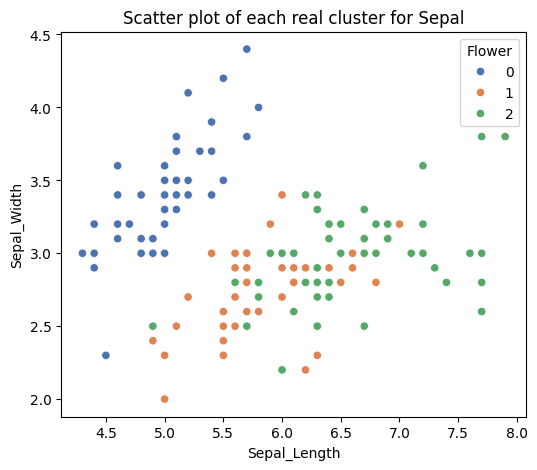

In [25]:
# Scatter plot of each real cluster for Sepal
plt.figure(figsize=(6, 5))
sns.scatterplot(x=dataset["Sepal_Length"], y=dataset["Sepal_Width"], hue=dataset["Flower"], palette="deep")
plt.title("Scatter plot of each real cluster for Sepal")
plt.show()

Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [26]:
# Select variables (one, two, three, four)
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["Flower"].values


In [28]:
# Understand the data X
print(type(X))
print(X.shape)
print(X)

<class 'numpy.ndarray'>
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4

In [29]:
# Understand the data y
print(type(y))
print(y.shape)
print(y)

<class 'numpy.ndarray'>
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [30]:
# Calculate the number of observations in the dataset
Nobs= y.shape[0]
print(Nobs)

150


In [31]:
# Calculate the number of observations for class 0
NobsClass0 = sum(y==0)
print(NobsClass0)

50


In [32]:
# Calculate the number of observations for class 1
NobsClass1 = sum(y==1)
print(NobsClass1)


50


In [33]:
# Calculate the number of observations for class 2
NobsClass2 = sum(y==2)
print(NobsClass2)

50


# Train a classifier

## Train the classification model

In [41]:
# Import sklearn linear_model
label_encoder = LabelEncoder()
dataset["Flower"] = label_encoder.fit_transform(dataset["Flower"])
X = dataset.drop(columns=["Flower"])
y = dataset["Flower"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the classifier
classifier = LogisticRegression(max_iter=200)
# Fit the model to the training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## Predict the class of a new observation

In [42]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew


array([[5.5, 3.5, 1.5, 0.5]])

In [43]:
# Make the prediction using xnew
predicted_class = classifier.predict(xnew)

# Get the predicted class
predicted_species = label_encoder.inverse_transform(predicted_class)
print(f"Predicted class: {predicted_species[0]}")

Predicted class: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [47]:
# Import sklearn train_test_split

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# Number of observations in the train set
print("Number of observations in the train set:", len(X_train))

Number of observations in the train set: 120


In [49]:
# Number of observations of each class in the train set
print("Number of observations per class in the train set:")
print(y_train.value_counts())

Number of observations per class in the train set:
Flower
1    41
0    40
2    39
Name: count, dtype: int64


In [50]:
# Number of observations in the test set
print("Number of observations in the test set:", len(X_test))

Number of observations in the test set: 30


In [52]:
# Number of observations of each class in the test set
print("Number of observations per class in the test set:")
print(y_test.value_counts())

Number of observations per class in the test set:
Flower
2    11
0    10
1     9
Name: count, dtype: int64


## Train the classification model

In [53]:
# Initialize the classifier

classifier = LogisticRegression(max_iter=200)

# Fit the model to the training data

classifier.fit(X_train, y_train)


LogisticRegression(max_iter=200)

## Test the classification model

In [54]:
# Make the predictions using the test set

y_pred = classifier.predict(X_test)


In [69]:
# Explore real and predicted labels
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results.head())

     Actual  Predicted
73        1          1
18        0          0
118       2          2
78        1          1
76        1          1


## Compute the acurracy

In [70]:
# Define a function to compute accuracy
def compute_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

In [59]:
# Calculate total accuracy
total_accuracy = compute_accuracy(y_test, y_pred)
print("Total accuracy:", total_accuracy)

Total accuracy: 1.0


In [62]:
# Calculate total accuracy using sklearn.metrics
sklearn_accuracy = accuracy_score(y_test, y_pred)
print("Total accuracy using sklearn.metrics:", sklearn_accuracy)
report = classification_report(y_test, y_pred, output_dict=True)

Total accuracy using sklearn.metrics: 1.0


In [63]:
# Compute accuracy for class 0
accuracy_class_0 = report["0"]["recall"]
print(f"Accuracy for class 0: {accuracy_class_0:.2f}")

Accuracy for class 0: 1.00


In [64]:
# Compute accuracy for class 1
accuracy_class_1 = report["1"]["recall"]
print(f"Accuracy for class 1: {accuracy_class_1:.2f}")


Accuracy for class 1: 1.00


In [65]:
# Compute accuracy for class 2
accuracy_class_2 = report["2"]["recall"]
print(f"Accuracy for class 2: {accuracy_class_2:.2f}")

Accuracy for class 2: 1.00


## Confussion matrix

In [67]:
# Compute confussion matrix (normalized confusion matrix)
cm = confusion_matrix(y_test, y_pred, normalize="true")
print("Normalized Confusion Matrix:\n", cm)

Normalized Confusion Matrix:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


<Figure size 600x500 with 0 Axes>

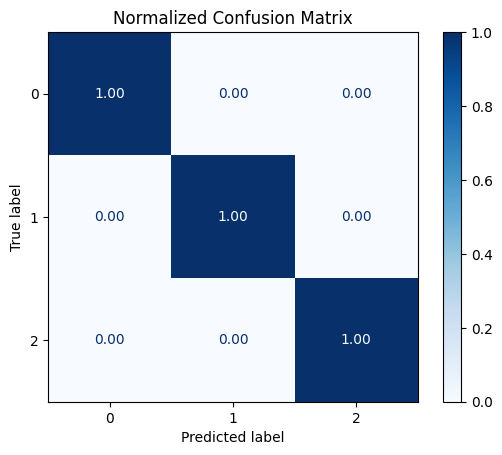

In [68]:
# Plot normalized confussion matrix
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Normalized Confusion Matrix")
plt.show()

# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?


2) Using the four variables, try with two classifiers. Which provides the best performance?

1) the best accuracy is by using the four variables
